## Exercice 4

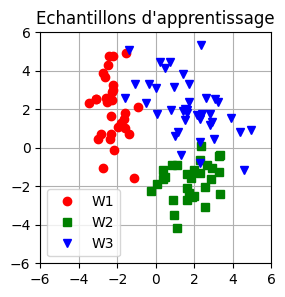

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

data = loadmat('Donnees_apprentissage.mat')
x1, x2, x3 = data['x1'], data['x2'], data['x3']
y1, y2, y3 = data['y1'], data['y2'], data['y3']

plt.figure(figsize=(3,3))
plt.plot(x1,y1, 'or', label='W1'), plt.plot(x2,y2,'sg', label='W2'), plt.plot(x3,y3,'vb', label='W3')
plt.axis([-6, 6, -6, 6])
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks(np.arange(-6, 7, 2))
plt.yticks(np.arange(-6, 7, 2))
plt.grid(True)
plt.box(True)
plt.title("Echantillons d'apprentissage")
plt.legend()
plt.show()

In [2]:
mx1, mx2, mx3 = np.mean(x1), np.mean(x2), np.mean(x3)
my1, my2, my3 = np.mean(y1), np.mean(y2), np.mean(y3)
sx1, sx2, sx3 = np.var(x1), np.var(x2), np.var(x3)
sy1, sy2, sy3 = np.var(y1), np.var(y2), np.var(y3)

N = len(x1) + len(x2) + len(x3)
P_w1 = len(x1) / N
P_w2 = len(x2) / N
P_w3 = len(x3) / N

print(f"Moyenne classe 1 : [{mx1:.2f}, {my1:.2f}] | variance : [{sx1:.2f}, {sy1:.2f}]")
print(f"Moyenne classe 2 : [{mx2:.2f}, {my2:.2f}] | variance : [{sx2:.2f}, {sy2:.2f}]")
print(f"Moyenne classe 3 : [{mx3:.2f}, {my3:.2f}] | variance : [{sx3:.2f}, {sy3:.2f}]")
print('\n P(w1) = ', P_w1, ' ; P(w2) = ', P_w2, ' ; P(w3) = ', P_w3)

Moyenne classe 1 : [-2.25, 2.03] | variance : [0.35, 2.64]
Moyenne classe 2 : [1.80, -1.73] | variance : [1.03, 0.91]
Moyenne classe 3 : [1.67, 2.09] | variance : [2.34, 2.16]

 P(w1) =  0.3  ; P(w2) =  0.3  ; P(w3) =  0.4


MAP : $g_i(x) = P(w_i|x) = P(x|w_i)P(w_i) = P(w_i) * \frac{1}{\sqrt{2\pi\sigma^2}}\exp(-\frac{1}{2\sigma^2}(x-\mu)^2)$  

In [3]:
def g(x, m, s):
    a = (x-m)*(x-m)/(2*s)
    b = 1/(np.sqrt(2*np.pi*s))
    return b*np.exp(-a) 

data = loadmat('Donnees_test.mat')
L = data['L']
x, y = data['x'], data['y']
N = len(x)
L_estim = np.zeros(shape=x.shape)

for k in range(N):
    g1 = P_w1 * g(x[k],mx1,sx1) * g(y[k],my1,sy1)
    g2 = P_w2 * g(x[k],mx2,sx2) * g(y[k],my2,sy2)
    g3 = P_w3 * g(x[k],mx3,sx3) * g(y[k],my3,sy3)

    L_estim[k] = 1 + np.argmax([g1, g2, g3])

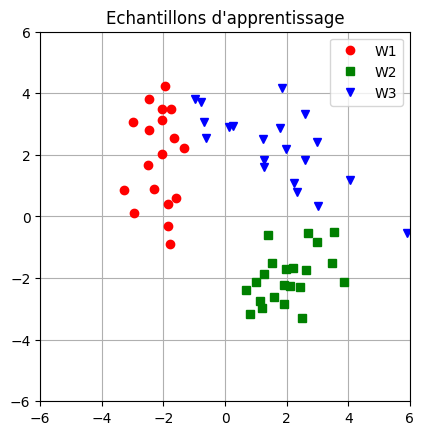

In [4]:
x1, y1 = [], []
x2, y2 = [], []
x3, y3 = [], []

for k in range(N):
    if L_estim[k] == 1:
        x1.append(x[k])
        y1.append(y[k])
    if L_estim[k] == 2:
        x2.append(x[k])
        y2.append(y[k])
    if L_estim[k] == 3:
        x3.append(x[k])
        y3.append(y[k])

plt.figure()
plt.plot(x1,y1, 'or', label='W1'), plt.plot(x2,y2,'sg', label='W2'), plt.plot(x3,y3,'vb', label='W3')
plt.axis([-6, 6, -6, 6])
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks(np.arange(-6, 7, 2))
plt.yticks(np.arange(-6, 7, 2))
plt.grid(True)
plt.box(True)
plt.title("Echantillons d'apprentissage")
plt.legend()
plt.show()

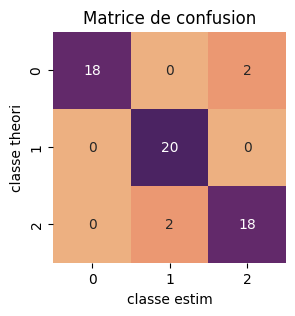

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

classify = (L == L_estim)
labels = np.concatenate((L, L_estim, classify), axis=1)

conf_matrix = confusion_matrix(L, L_estim)

# Création du graphique
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='flare', cbar=False)
plt.xlabel('classe estim')
plt.ylabel('classe theori')
plt.title('Matrice de confusion')

# Affichage du graphique
plt.show()


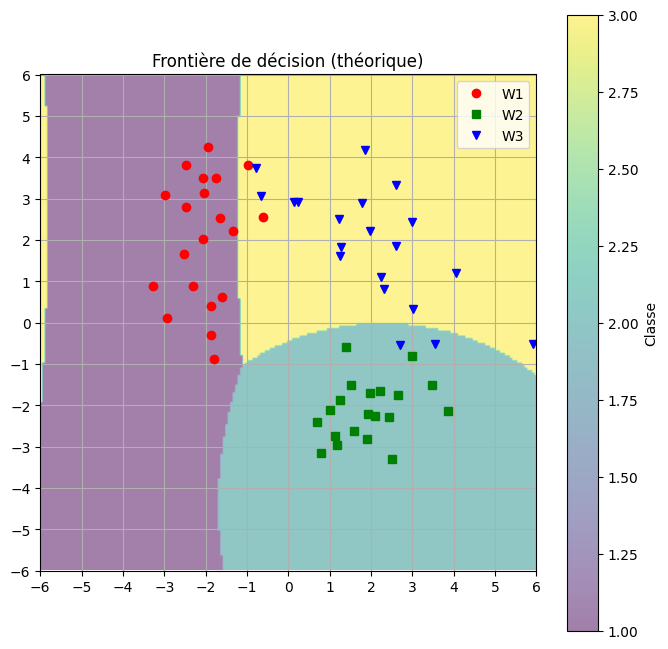

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

cmap = 'viridis'  # Exemple de carte de couleurs

# Grille de valeurs
x_mesh = np.arange(-5, 5.05, 0.05)
y_mesh = np.arange(-5, 5.05, 0.05)
X_mesh, Y_mesh = np.meshgrid(x_mesh, y_mesh)

L_mesh = np.zeros(X_mesh.shape)

for i in range(X_mesh.shape[0]):
    for j in range(X_mesh.shape[1]):
        g1 = P_w1 * g(X_mesh[i,j],mx1,sx1) * g(Y_mesh[i,j],my1,sy1)
        g2 = P_w2 * g(X_mesh[i,j],mx2,sx2) * g(Y_mesh[i,j],my2,sy2)
        g3 = P_w3 * g(X_mesh[i,j],mx3,sx3) * g(Y_mesh[i,j],my3,sy3)
        
        L_mesh[i,j] = 1 + np.argmax([g1, g2, g3])

x1_t, y1_t = [], []
x2_t, y2_t = [], []
x3_t, y3_t = [], []

for k in range(N):
    if L[k] == 1:
        x1_t.append(x[k])
        y1_t.append(y[k])
    if L[k] == 2:
        x2_t.append(x[k])
        y2_t.append(y[k])
    if L[k] == 3:
        x3_t.append(x[k])
        y3_t.append(y[k])

# Affichage de la carte de décision
plt.figure(figsize=(8, 8))
plt.plot(x1_t,y1_t, 'or', label='W1'), plt.plot(x2_t,y2_t,'sg', label='W2'), plt.plot(x3_t,y3_t,'vb', label='W3')
plt.imshow(L_mesh, extent=[-6, 6, -6, 6], origin='lower', cmap=cmap, alpha=0.5)
plt.colorbar(label="Classe")

# Configuration de l'axe et légendes
plt.axis([-6, 6, -6, 6])
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks(np.arange(-6, 7, 1))
plt.yticks(np.arange(-6, 7, 1))
plt.grid(True)
plt.box(True)
plt.title("Frontière de décision (théorique)")
plt.legend()
plt.show()
